# Basic Spatial Transcriptomic Analysis

In this analysis we will observe the spatial data present and see how it maps onto the cell clusters.
This allows us to visualize how the different cell types were organized in the sequenced tissue.

In [ ]:
#### Libraries ####
library(ggplot2)
library(plotly)

In [ ]:
# load the function
source(file.path(
  "..",
  "preprocessing",
  "load_and_prepare_data.R"
))

# point to the data
matrix_data <- file.path(
  "..",
  "data",
  "fetal_human_heart",
  "filtered_matrix.tsv.gz"
)
meta_data <- file.path(
  "..",
  "data",
  "fetal_human_heart",
  "meta_data.tsv.gz"
)

# make a Seurat object
seu_obj <- fetal_human_heart(matrix_data, meta_data)

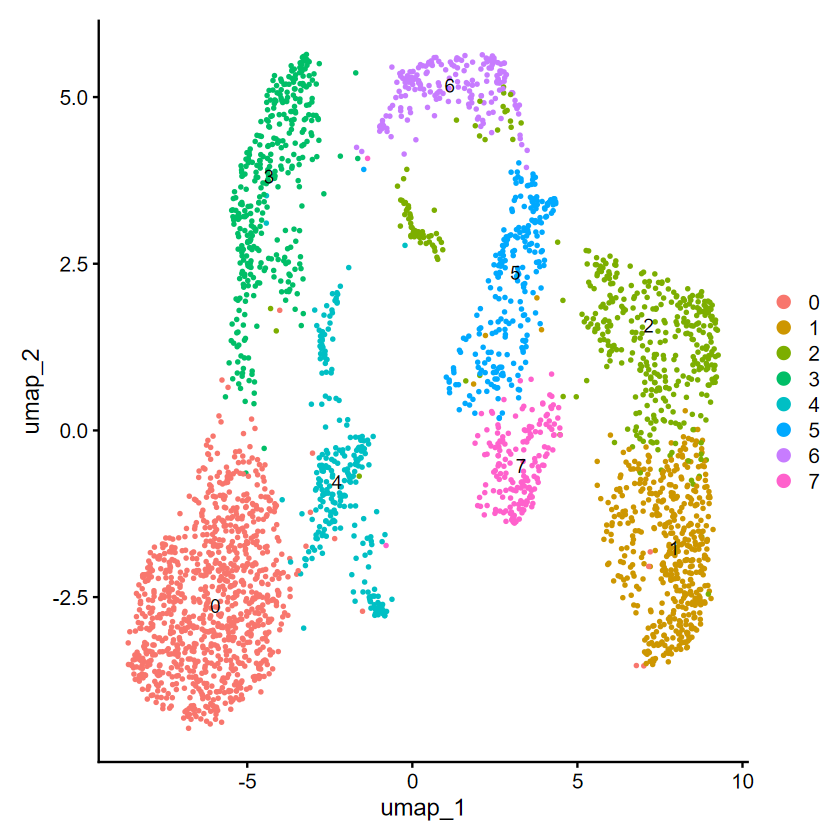

In [3]:
# Generate a UMAP plot colored by clusters
DimPlot(seu_obj, reduction = "umap", label = TRUE)

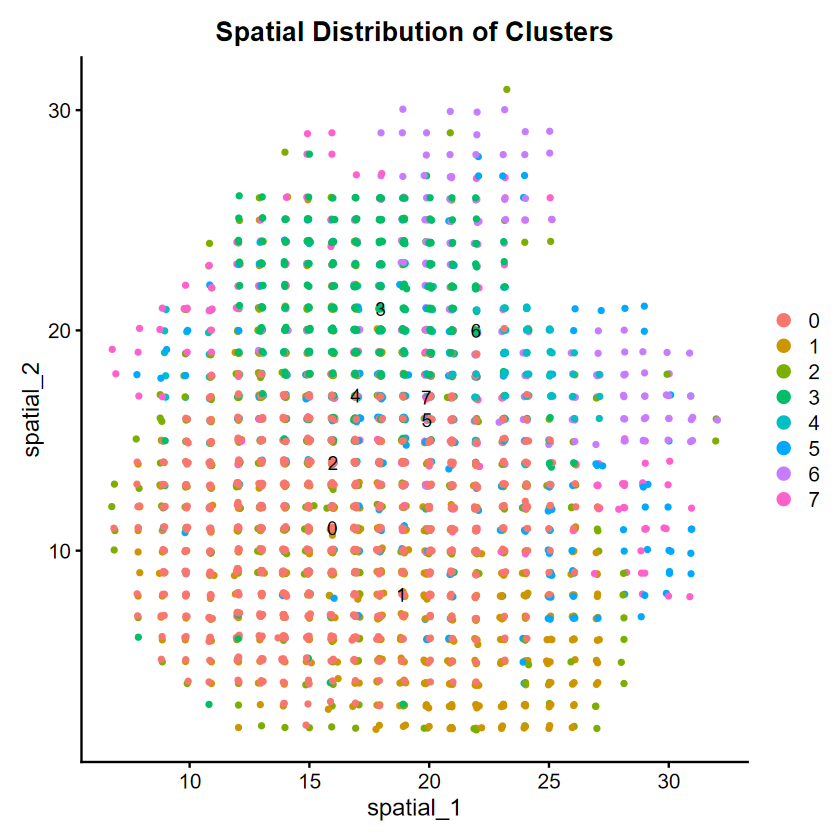

In [4]:
#### Visualize Spatial Distribution of Clusters ####

# Plot the spatial coordinates colored by clusters
DimPlot(
  seu_obj,
  reduction = "spatial",
  group.by = "seurat_clusters",
  label = TRUE,
  pt.size = 1
) +
  ggtitle("Spatial Distribution of Clusters")

In [ ]:
#### Visualize Clusters in interactive 3D UMAP ####

# Run a 3D UMAP
seu_obj <- RunUMAP(
  seu_obj,
  dims = 1:10,
  n.components = 3,
  reduction.name = "umap3d"
)

# Extract UMAP embeddings
umap_3d <- Embeddings(seu_obj, "umap3d")

# Create an interactive 3D plot
plot_ly(
  x = umap_3d[, 1], y = umap_3d[, 2], z = umap_3d[, 3],
  color = as.factor(seu_obj$seurat_clusters),
  colors = RColorBrewer::brewer.pal(n = length(unique(seu_obj$seurat_clusters)),
                                    name = "Set1"),
  type = "scatter3d", mode = "markers"
) %>%
  layout(title = "3D UMAP Plot Colored by Clusters")